In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [10]:
pip install torch torchvision torchaudio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import easyocr
import spacy

# Load the English model in Spacy
nlp = spacy.load("en_core_web_sm")

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Read the text from the image
result = reader.readtext('/content/heshmat.jpg', detail=0)

# Join the OCR output into a single string
text = ' '.join(result)

# Pass the text through the Spacy model
doc = nlp(text)

# Initialize variables to store the full name, the current name, and the ID number
full_name = ""
current_name = ""
id_number = ""

# Loop through each token in the Spacy document
for token in doc:
    # If the token is a proper noun, add it to the current name
    if token.pos_ == "PROPN":
        current_name += " " + token.text
    # If the token is a digit and it has length 7, store it as the ID number
    elif token.pos_ == "NUM" and len(token.text) == 9:
        id_number = token.text
    # If the token is not a proper noun and the current name has at least four names, store it as the full name
    elif len(current_name.split()) >= 4:
        full_name = current_name
        current_name = ""
    # If the token is not a proper noun and the current name has less than four names, reset the current name
    else:
        current_name = ""

# If the current name has at least four names, store it as the full name
if len(current_name.split()) >= 4:
    full_name = current_name

if "ID Number" in full_name:
  full_name = full_name.replace('ID Number', '')


# Print the full name and ID number
print("Full Name: ", full_name)
print("ID Number: ", id_number)


Full Name:   Mohamed Abdelshafi 
ID Number:  120220102


In [21]:
import cv2

# Load the ID image and convert it to grayscale
img = cv2.imread('/content/heshmat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/haarcascade_frontalface_default.xml')

# Detect the faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Extract the first face from the image
(x,y,w,h) = faces[0]
face = img[y:y+h, x:x+w]

# Save the face as a separate image
cv2.imwrite('face_image.jpg', face)


error: ignored

In [22]:
import cv2

# Load the image
image = cv2.imread("/content/heshmat.jpg")

# Check if the image was properly loaded
if image is not None:
    print("Image shape:", image.shape)
else:
    print("Failed to load image")


Image shape: (960, 1280, 3)


In [24]:
import cv2
from google.colab.patches import cv2_imshow

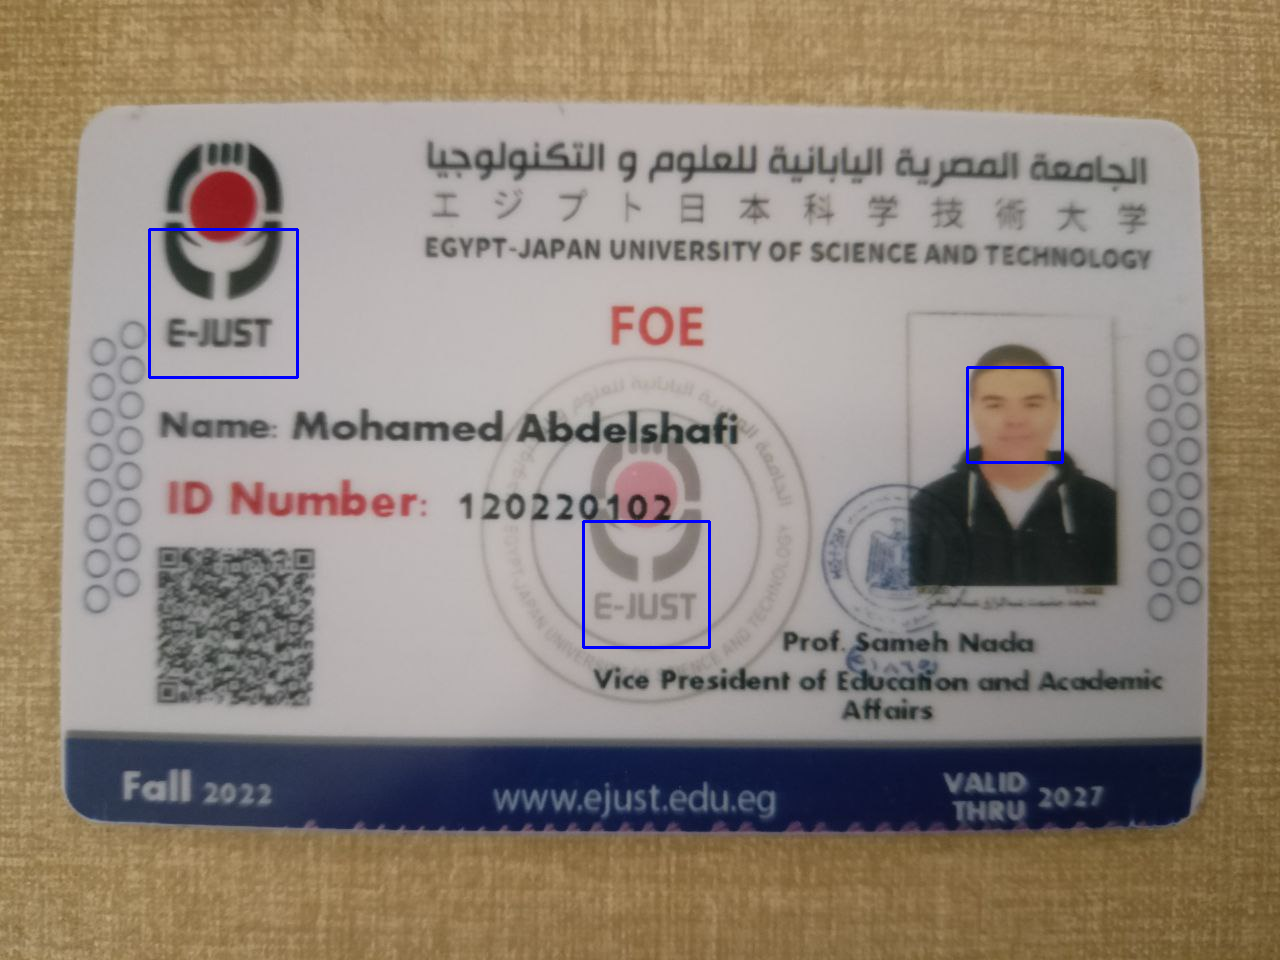

In [30]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('/content/heshmat.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 10)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
cv2_imshow(img)